# Assignment 6: Implement Stochastic-Gradient-Descent on Boston house prices dataset

This exercise is to apply Stochastic-Gradient-Descent(SGD) algorithm on boston house prices dataset and predict the price of the house which will be bought.

### OBJECTIVE : Implement SGD on Linear Regression


In [1]:
# Importing the required libraries

%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore', category = UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor

from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from prettytable import PrettyTable

## 1. Reading the data

### `Relevant information about the dataset:`

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print('='*120)
print('\n', boston.DESCR, '\n')
print('='*120)


 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  

## 2. Data analysis

### Shape of dataset 

In [3]:
print(boston.data.shape)

(506, 13)


### Feature names of the dataset

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Shape of target values (actual prices)

In [5]:
print(boston.target.shape)

(506,)


### Creating the target and features data frame

In [6]:
boston_data = pd.DataFrame(boston.data)
boston_target = pd.DataFrame(boston.target)

In [7]:
print(boston_data.info())
print('\n', '='*100, '\n')
print(boston_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
0    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
None


## NOTE:
1. There are total 506 data points and 13 features in the dataset.
2. The target contains 506 data points and has the actual prices of the houses.

In [8]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Renaming the columns with features names

In [10]:
boston_data.columns = boston.feature_names
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Now adding the price column in the dataset which is available in the boston_target data frame

In [11]:
boston_data['PRICE'] = boston_target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [13]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h1><font color='red'>************************************ASSIGNMENT************************************</font></h1>

## 3. Creating the Labels and Features 

In [14]:
# Creating label and feature data frame : Label- y, Features- X

# Labels
y = boston_data['PRICE'].values

# Dropping price column
boston_data.drop(['PRICE'], axis=1, inplace=True)

# Features
X = boston_data.values

print(X.shape)
print(y.shape)


(506, 13)
(506,)


## 4. Splitting data into Train and test

In [15]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

## Shape of the matrices

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## 5. Standardizing Numerical features

In [16]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

print('Data Standardized:\n')
print('\nTrain data : ')
print(X_train.shape)
print('\n', X_train[:3, :])
print('\n', '='*120)
print('\nTest data : ')
print(X_test.shape)
print('\n', X_test[:3, :])


Data Standardized:


Train data : 
(354, 13)

 [[ 0.87550928 -0.49961764  1.06960848 -0.2511236   1.64542839  0.23377208
   0.96988179 -0.90052238  1.65448584  1.53881318  0.81091271 -3.46382037
   1.61136934]
 [ 0.47466521 -0.49961764  1.06960848 -0.2511236   1.11343548 -0.1497148
   0.38315913 -0.92615201  1.65448584  1.53881318  0.81091271 -2.87288804
   1.26563608]
 [ 0.27344444 -0.49961764  1.06960848 -0.2511236  -0.16858021  0.65330096
   0.27073324 -0.24199289  1.65448584  1.53881318  0.81091271  0.3899569
  -0.67103236]]


Test data : 
(152, 13)

 [[-0.37258032 -0.49961764 -0.70149647 -0.2511236  -0.41277367  2.51306819
   0.67827712 -0.29883872 -0.18332702 -0.58247559 -0.4990232   0.32730729
  -1.31893087]
 [-0.41454735  3.00699239 -0.88753691 -0.2511236  -1.22384483  0.48029936
  -1.53862107  0.63274676 -0.64278024 -0.9488263   0.34307845  0.43212703
  -1.09827996]
 [-0.4132507  -0.49961764 -1.11673873 -0.2511236  -0.5435916   0.17322152
  -0.03843799 -0.35931091 -0.87250685 

# ------------------ Implementing Sklearn's Linear Regression ------------------

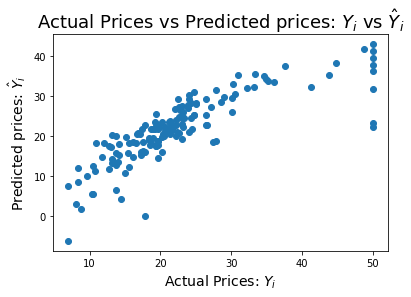

In [17]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred_lm = lm.predict(X_test)

plt.scatter(Y_test, Y_pred_lm)
plt.xlabel("Actual Prices: $Y_i$", size = 14)
plt.ylabel("Predicted prices: $\hat{Y}_i$", size = 14)
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$", size = 18)
plt.show()

### Attributes

In [18]:
# Linear regressor cofficients
lm_features = lm.coef_
print('The Coefficients are : \n', lm_features)

The Coefficients are : 
 [-1.27363359  0.94438381 -0.17050408  0.18568703 -1.48334986  2.80195533
 -0.29987372 -2.72418289  2.77088061 -2.13961719 -2.08896111  1.15085564
 -3.28764536]


In [19]:
# Linear regressor y_intercept
lm_intercept = lm.intercept_
print('The Y_intercept for Linear regressor : \n', lm_intercept)

The Y_intercept for Linear regressor : 
 22.556214689265566


### `Distribution of ΔY (ERRORS)`

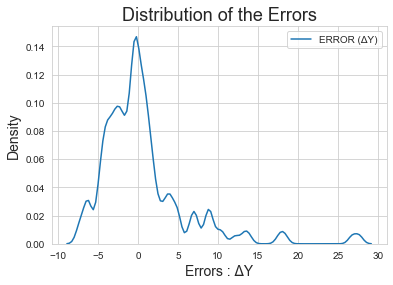

In [20]:
import seaborn as sns
import numpy as np

# Calculating the errors
delta_y = Y_test - Y_pred_lm

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5, label = 'ERROR (ΔY)')
plt.xlabel('Errors : ΔY', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Errors', size = 18)
plt.show()

### `Distribution of Predicted Values (ŷ)`

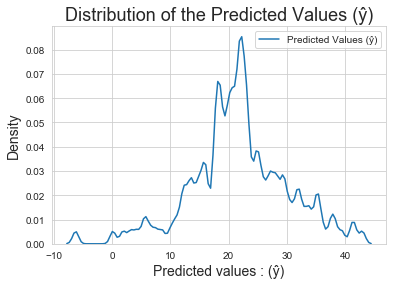

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred_lm), bw=0.5, label = 'Predicted Values (ŷ)')
plt.xlabel('Predicted values : (ŷ)', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Predicted Values (ŷ)', size = 18)
plt.show()

### Finding the Errors

In [22]:
# Calculating accuracy for Linear Regression using SKLEARN
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("For Linear Regression using SKlearn the accuracy messures are:")

# Calculating Mean Absolute Error (MAE)
lm_mae = mean_absolute_error(Y_test, Y_pred_lm)
print("\nMean Absolute Error : ", lm_mae)

# Calculating Mean Squared Error (MSE)
lm_mse = mean_squared_error(Y_test, Y_pred_lm)
print("\nMean Squared Error : ", lm_mse)

# Calculating Root Mean Squared Error (RMSE)
lm_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lm))
print("\nRoot Mean Squared Error : ", lm_rmse)

For Linear Regression using SKlearn the accuracy messures are:

Mean Absolute Error :  3.557668475650041

Mean Squared Error :  30.697037704088565

Root Mean Squared Error :  5.540490745781331


In [26]:
X_test.shape

(152, 13)

# ---------------------- Implementing Sklearn's SGD Regression ----------------------

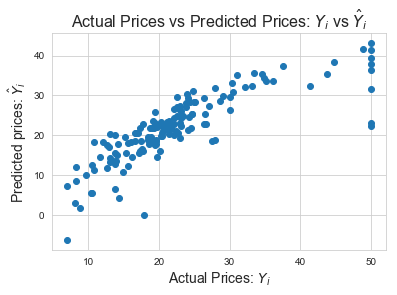

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

from sklearn.linear_model import SGDRegressor
sgd_sklearn = SGDRegressor(penalty = 'none', learning_rate = 'constant', 
                           eta0 = 0.001, max_iter = 30000, tol = 1e-3, n_iter_no_change = 10000)

sgd_sklearn.fit(X_train, Y_train)

sgd_predictions = sgd_sklearn.predict(X_test)

plt.scatter(Y_test, sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$", size = 14)
plt.ylabel("Predicted prices: $\hat{Y}_i$", size = 14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$", size = 16)
plt.show()

### Attributes

In [26]:
# Weights of Sklearn's SGD
sgd_weights = sgd_sklearn.coef_

print('The Weights for the Sklearn SGDRegressor : \n', sgd_weights)

The Weights for the Sklearn SGDRegressor : 
 [-1.26184683  0.96474076 -0.19886105  0.16772677 -1.51230068  2.81531525
 -0.30934183 -2.71675278  2.77080453 -2.15386247 -2.09929274  1.16605678
 -3.29492194]


In [27]:
# Intercept of Sklearn's SGD
sgd_intercept = sgd_sklearn.intercept_
print('Y_intercept for the Sklearn SGDRegressor : \n', sgd_intercept)

Y_intercept for the Sklearn SGDRegressor : 
 [22.56812612]


In [28]:
# Number of iterations performed to reach the stopping criterion
sgd_iterations = sgd_sklearn.n_iter_
print('Number of iterations performed for stopping criterion (convergence) : \n', sgd_iterations)

Number of iterations performed for stopping criterion (convergence) : 
 27141


### `Distribution of ΔY (ERRORS)`

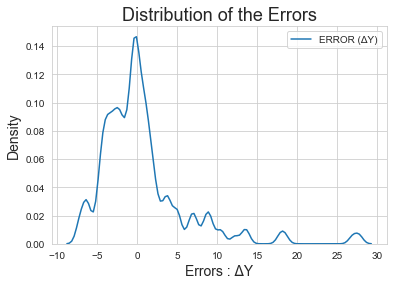

In [29]:
import seaborn as sns
import numpy as np

# Calculating the errors
sgd_delta_y = Y_test - sgd_predictions

sns.set_style('whitegrid')
sns.kdeplot(np.array(sgd_delta_y), bw=0.5, label = 'ERROR (ΔY)')
plt.xlabel('Errors : ΔY', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Errors', size = 18)
plt.show()

### `Distribution of Predicted Values (ŷ)`

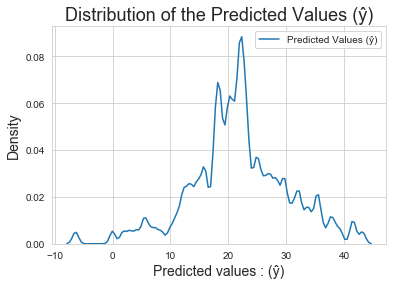

In [30]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sgd_predictions), bw=0.5, label = 'Predicted Values (ŷ)')
plt.xlabel('Predicted values : (ŷ)', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Predicted Values (ŷ)', size = 18)
plt.show()

### Finding the Errors

In [31]:
# Calculating accuracy for SGDRegressor using SKLEARN
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("For Linear Regression using SKlearn the accuracy messures are:")

# Calculating Mean Absolute Error (MAE)
sgd_mae = mean_absolute_error(Y_test, sgd_predictions)
print("\nMean Absolute Error : ", sgd_mae)

# Calculating Mean Squared Error (MSE)
sgd_mse = mean_squared_error(Y_test, sgd_predictions)
print("\nMean Squared Error : ", sgd_mse)

# Calculating Root Mean Squared Error (RMSE)
sgd_rmse = np.sqrt(mean_squared_error(Y_test, sgd_predictions))
print("\nRoot Mean Squared Error : ", sgd_rmse)

For Linear Regression using SKlearn the accuracy messures are:

Mean Absolute Error :  3.56779771513776

Mean Squared Error :  30.95808550817274

Root Mean Squared Error :  5.56399905716857


# ---------------------- Implementing Custom SGD Regression ----------------------

### Making the SGDRegressor function

In [32]:
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
# Reference : https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# https://github.com/anshuak100/Implement-SGD-to-Linear-Regression-on-Boston-house-prices-dataset/blob/master/sgd_imp_final.ipynb

# Making our own SGD Regression function
# This function is a simple implementation of SGD for linear regression without any regularization
# Required parameters are : 
    # Features data (X)
    # Target values (y)
    # Learning rate (learning_rate)
    # Number of iteration (n_iter)

def custom_SGDRegressor(X, y, learning_rate = 0.001, n_iter = 1000):
    
    """
    - This is a custom implementation of SGD Regression.
    
    - To find the weight vector : [partial differentiation wrt w] 
                                   dl/dw = 1/k*(-2x)*(y-wTx-b)
    
    - To find the intercept :     [partial differentiation wrt b] 
                                   dl/db = 1/k*(-2)*(y-wTx-b)
                                 
    - Learning rate is constant.
    - The function returns weights (w) and intercept (b)
    - The Default batch size is 100 (taking  K = 100)
    
    """
    
    weight_current = np.zeros(shape=(1, X.shape[1]))
    b_current = 0
    current_iter = 1
    k = 100
    r = learning_rate
    
    while(current_iter <= n_iter):
        
        weight_old = weight_current
        b_old = b_current
        
        w_temp = np.zeros(shape=(1, X.shape[1]))
        b_temp = 0
        
        # Converting into numpy array
        x = np.array(X)
        y = np.array(y)
        
        # Getting the derivatives using sgd with K=50
        for i in range(k):
            
            w_temp += x[i] * (y[i] - (np.dot(weight_old, x[i]) + b_old)) * (-2/k)
            b_temp += (y[i] - (np.dot(weight_old, x[i]) + b_old)) * (-2/k)
            
        # Updating the weights and intercept
        weight_current = weight_old - (r * w_temp)
        b_current = b_old - (r * b_temp)
        
        if(weight_old == weight_current).all():
            break
        
        # Changing the learning rate
        #r /= 2
        
        current_iter += 1
        
    return weight_current, b_current
    

### Making the predict function

In [33]:
def custom_predict(x, w, b):
    
    """
    This function predicts the target values
    """
    y_pred=[]
    
    for i in range(len(x)):
        y=np.asscalar(np.dot(w, x[i])+b)
        y_pred.append(y)
        
    return np.array(y_pred)

### Using the custom_SGDRegressor function

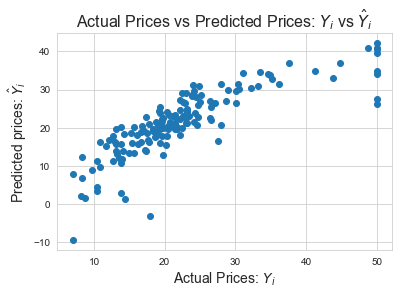

Wall time: 33.6 s


In [34]:
%%time
# Function call custom_SGDRegressor
w, b = custom_SGDRegressor(X_train, Y_train, learning_rate = 0.001, n_iter = 10000)

# Function call custom_predict
custom_y_pred = custom_predict(X_test, w, b)

# Plotting the graph
plt.scatter(Y_test, custom_y_pred)
plt.xlabel("Actual Prices: $Y_i$", size = 14)
plt.ylabel("Predicted prices: $\hat{Y}_i$", size = 14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$", size = 16)
plt.show()

### Attributes

In [35]:
# Weights of custom_SGDRegressor's SGD

print('The Weights for the Sklearn SGDRegressor : \n', w)

The Weights for the Sklearn SGDRegressor : 
 [[-1.21915874  1.35169579  0.10109467  0.40071872 -1.02312038  1.81922292
   0.90313939 -2.61325675  2.1669508  -1.73369138 -1.98674643  1.07587925
  -5.38548089]]


In [36]:
# Intercept of Sklearn's SGD

print('Y_intercept for the Sklearn SGDRegressor : \n', b)

Y_intercept for the Sklearn SGDRegressor : 
 [21.93212945]


### `Distribution of ΔY (ERRORS)`

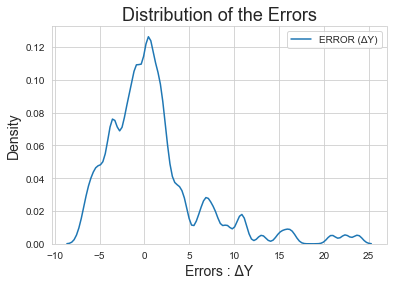

In [37]:
import seaborn as sns
import numpy as np

# Calculating the errors
custom_delta_y = Y_test - custom_y_pred

sns.set_style('whitegrid')
sns.kdeplot(np.array(custom_delta_y), bw=0.5, label = 'ERROR (ΔY)')
plt.xlabel('Errors : ΔY', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Errors', size = 18)
plt.show()

### `Distribution of Predicted Values (ŷ)`

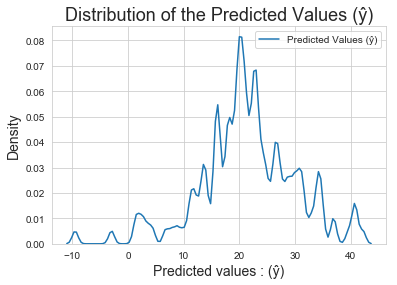

In [38]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(custom_y_pred), bw=0.5, label = 'Predicted Values (ŷ)')
plt.xlabel('Predicted values : (ŷ)', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Predicted Values (ŷ)', size = 18)
plt.show()

### Finding the ERRORS

In [39]:
# Calculating accuracy for custom_SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("For Linear Regression using SKlearn the accuracy messures are:")

# Calculating Mean Absolute Error (MAE)
custom_sgd_mae = mean_absolute_error(Y_test, custom_y_pred)
print("\nMean Absolute Error : ", custom_sgd_mae)

# Calculating Mean Squared Error (MSE)
custom_sgd_mse = mean_squared_error(Y_test, custom_y_pred)
print("\nMean Squared Error : ", custom_sgd_mse)

# Calculating Root Mean Squared Error (RMSE)
custom_sgd_rmse = np.sqrt(mean_squared_error(Y_test, custom_y_pred))
print("\nRoot Mean Squared Error : ", custom_sgd_rmse)

For Linear Regression using SKlearn the accuracy messures are:

Mean Absolute Error :  3.6835360700102426

Mean Squared Error :  30.58470057553007

Root Mean Squared Error :  5.530343621831293


#      ------------------------------- MAKING OBSERVATIONS -------------------------------

## Comparing the weights produced by both Custom SGD and Sklearn's SGD

In [40]:
#http://zetcode.com/python/prettytable/
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
x = PrettyTable()

# Serial numbers
sl_num = [1,2,3,4,5,6,7,8,9,10,11,12,13]

# Adding rows
x.field_names = ["Weights of Custom SGD", "Weights of Sklearn's SGD"]
for i in range(13):
    x.add_row([w[0][i], sgd_weights[i]])

# Printing the Table
print(x)

+-----------------------+--------------------------+
| Weights of Custom SGD | Weights of Sklearn's SGD |
+-----------------------+--------------------------+
|  -1.2191587376635329  |    -1.261846831849137    |
|   1.3516957927362003  |    0.9647407602727651    |
|  0.10109467269827319  |   -0.19886105180285363   |
|  0.40071871598554387  |   0.16772676832602343    |
|  -1.0231203794016348  |   -1.5123006828939547    |
|   1.8192229228474155  |    2.815315251516159     |
|   0.9031393878237518  |   -0.30934182644689534   |
|   -2.613256753592579  |   -2.7167527776570233    |
|   2.1669508015718177  |    2.7708045266311676    |
|  -1.7336913789229846  |   -2.1538624709275678    |
|  -1.9867464305204734  |   -2.0992927440696416    |
|   1.0758792504472465  |    1.1660567799304538    |
|   -5.385480893725979  |   -3.2949219413044424    |
+-----------------------+--------------------------+


## Comparing the parameters of both the custom SGD and the Sklearn's SGD

In [41]:
#http://zetcode.com/python/prettytable/
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
x = PrettyTable()

# Adding rows
x.field_names = ["Regressor(Algorithm)", "Learning rate(type)", "Learning rate(r value)", "Number of iterations(n_iter)"]
x.add_row(["custom_SGDRegressor", "Constant", 0.001, 10000])
x.add_row(["Sklearn's SGDRegressor", "Constant", 0.001, 10000])

# Printing the Table
print(x)

+------------------------+---------------------+------------------------+------------------------------+
|  Regressor(Algorithm)  | Learning rate(type) | Learning rate(r value) | Number of iterations(n_iter) |
+------------------------+---------------------+------------------------+------------------------------+
|  custom_SGDRegressor   |       Constant      |         0.001          |            10000             |
| Sklearn's SGDRegressor |       Constant      |         0.001          |            10000             |
+------------------------+---------------------+------------------------+------------------------------+


## Comparing the Errors produced by Custom SGD , Sklearn's SGD and Linear Regression

In [42]:
#http://zetcode.com/python/prettytable/
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
x = PrettyTable()

# Adding rows
x.field_names = ["Regressor(Algorithm)", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "Y_intercept"]
x.add_row(["custom_SGDRegressor", custom_sgd_mae, custom_sgd_mse, custom_sgd_rmse, b])
x.add_row(["Sklearn's SGDRegressor", sgd_mae, sgd_mse, sgd_rmse, sgd_intercept])
x.add_row(["Sklearn's LinearRegression", lm_mae, lm_mse, lm_rmse, lm_intercept])

# Printing the Table
print(x)

+----------------------------+---------------------+--------------------+-------------------------+--------------------+
|    Regressor(Algorithm)    | Mean Absolute Error | Mean Squared Error | Root Mean Squared Error |    Y_intercept     |
+----------------------------+---------------------+--------------------+-------------------------+--------------------+
|    custom_SGDRegressor     |  3.6835360700102426 | 30.58470057553007  |    5.530343621831293    |   [21.93212945]    |
|   Sklearn's SGDRegressor   |   3.56779771513776  | 30.95808550817274  |     5.56399905716857    |   [22.56812612]    |
| Sklearn's LinearRegression |  3.557668475650041  | 30.697037704088565 |    5.540490745781331    | 22.556214689265566 |
+----------------------------+---------------------+--------------------+-------------------------+--------------------+


## Comparing graphically

### `Distribution of ΔY [custom_SGDRegressor vs Sklearn's SGDRegressor]`

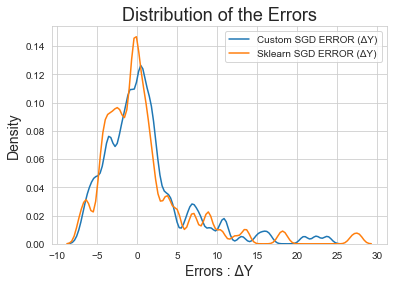

In [43]:
# Combining the plots and comapring the errors

sns.set_style('whitegrid')
sns.kdeplot(np.array(custom_delta_y), bw=0.5, label = 'Custom SGD ERROR (ΔY)')
sns.kdeplot(np.array(sgd_delta_y), bw=0.5, label = 'Sklearn SGD ERROR (ΔY)')
plt.xlabel('Errors : ΔY', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Errors', size = 18)
plt.show()

### `Distribution of Predicted Values (ŷ) [custom_SGDRegressor vs Sklearn's SGDRegressor]`

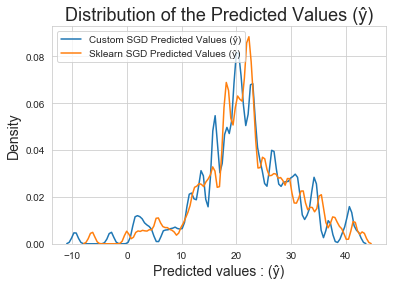

In [44]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(custom_y_pred), bw=0.5, label = 'Custom SGD Predicted Values (ŷ)')
sns.kdeplot(np.array(sgd_predictions), bw=0.5, label = 'Sklearn SGD Predicted Values (ŷ)')
plt.xlabel('Predicted values : (ŷ)', size = 14)
plt.ylabel('Density', size = 14)
plt.title('Distribution of the Predicted Values (ŷ)', size = 18)
plt.show()

## Pseudocode (custom_SGDRegressor):

[1] Initialize number of iterations (current_iter), batch size (k), 
    intercept value (b), learning_rate (r) and weight vector (w).
    
[2] While current iteration is less than total no. of iteration .

[3] For all items in batch (k value).

[4] Calculate weighted vector and intercept value.

[5] Update weighted vector and intercept values by reducing from old values .

[6] Update iteration number.

[7] Repeate the above 6 steps until (current iteration > total iteration) 
    or (weight vectors of two sucessive iterations are same)

[7] Return the optimal W and B (weight vector and intercept)

## CONCLUSION

## NOTE:
1. As we can see that the "custom_SGDRegressor" and the Sklearn's SGDRegressor both have the same MSE(mean squared error).
2. After looking at the error graph we can say that in the -ve side of the graph, the error is more.
3. By looking at the distribution of predicted value graph, It is clear that prediction of implemented SGD and sklearn SGD both are ovelapping (not perfectly) but they perform near about close to each other.
4. Sklearn's SGD makes more number of Errors compared to custom SGD.
5. We can tune the custom SGD by changing the parameter values and can improve it's performance by:
    - Changing the batch size
    - Changing the number of iterations
    - Changing the learning rate
    - Featurizing the data
6. Both the models are not PERFECT but they are OKAY to be used.
7. We have kept the learning rate as `CONSTANT` but if we change it to `INVERSESCALING` our results may varry.

## Procedure:

### To predict the price of a given point from the data we can follow the following steps:

#### IMPORTANT NOTE:

    - As the custom_SGD takes 4 parameters:
        1. X - Features
        2. Y - Target Value (Actual value of the target variable)
        3. Learning rate (r value)
        4. Number of iterations for convergence i.e. (stop when current iteration > total iteration or weight vectors of two
           sucessive iterations are same)
    
    - We need to train the model using the training data (X_train and Y-Train) and obtain 
      the weights and intercepts (W and B)
    
    - Using those weights and intercepts we can use the below formula to calculate the Y_hat(predicted) Values

    - NOTE:
    
    The formula used for predicting the new data points is : [Y = M*X + C]
    - where: 
        Y is the predicted value, 
        M is the weight vector returned by the custom_SGDRegressor, 
        C is the y-intercept 

###   After fitting the training data we will obtain the test results by predicting through the following steps:
    
    = [STEP 1] - Using the same weights and intercept value (w and b) returned by the custom_SGDRegressor, 
                 we will use the "custom_predict" method to find the predicted prices by passing the X_test, w and b
                 as the parameters of the "custom_predict" function.
                 
    = [STEP 2] - The predicted prices thus obtained are then used for comparing with the actual values of the house.
    
    = [STEP 3] - We can plot a graph if there are more number of predicted values or else we can simply print the y_pred 
                 values and the y_test values and compare them using the error metric (MEAN SQUARED ERROR VALES).
                 
    = [STEP 4] - Find the errors made by the regressor by finding the Mean squared error between 
                 actual and predicted prices.
    
    = [STEP 5] - Try to reduce the error by adjusting the `learning_rate` and `number_of_iterations` 
                 to find the convergence.
    
    = [STEP 6] - When the error doesn't decreases further we can say that we have reached the stage where our model is able 
                 to predict the prices with minimum error.